In [1]:
# load pytraj and trajectory
import pytraj as pt

# to save time for this tutorial, we only load first 8000 frames (8 ns)
traj = pt.iterload('traj.nc', 'lysozyme.top', frame_slice=(0, 8000))
traj

<pytraj.TrajectoryIterator, 8000 frames, include:
<Topology: 1961 atoms, 129 residues, 1 mols, non-PBC>>
           

In [2]:
# load experimental data (residue number and S2)
resnums, s2_expl = np.loadtxt('Lys.order.expl.dat').T[:2]
resnums = resnums.astype('i4')
print('residue numbers: ', resnums)
print('s2 from expl ', s2_expl)

residue numbers:  [  2   3   4 ..., 127 128 129]
s2 from expl  [ 0.83  0.83  0.83 ...,  0.77  0.76  0.6 ]


In [3]:
# creat N-H vector pairs

# select H (backbone) indices with given residue number (from previous step)
H_mask = ':' + ','.join(str(i) for i in resnums) + '@H'
print('H_mask: ', H_mask)
h_indices = pt.select_atoms(traj.top, H_mask)

# select N (backbone) indices
n_indices = h_indices - 1

# create pairs
nh_pairs = list(zip(n_indices, h_indices))
nh_pairs[:3]

H_mask:  :2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,74,75,76,77,78,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129@H


[(24, 25), (40, 41), (60, 61)]

In [4]:
# do calculation
s2 = pt.NH_order_paramters(traj, nh_pairs, tcorr=8000., tstep=1.0)
s2

array([ 0.20851798,  0.31452838,  0.24659677, ...,  0.7313512 ,
        0.77076203,  0.38065991], dtype=float32)

In [5]:
# load experimental S2 data
import numpy as np
# only take data in 2nd column
print(s2_expl)

[ 0.83  0.83  0.83 ...,  0.77  0.76  0.6 ]


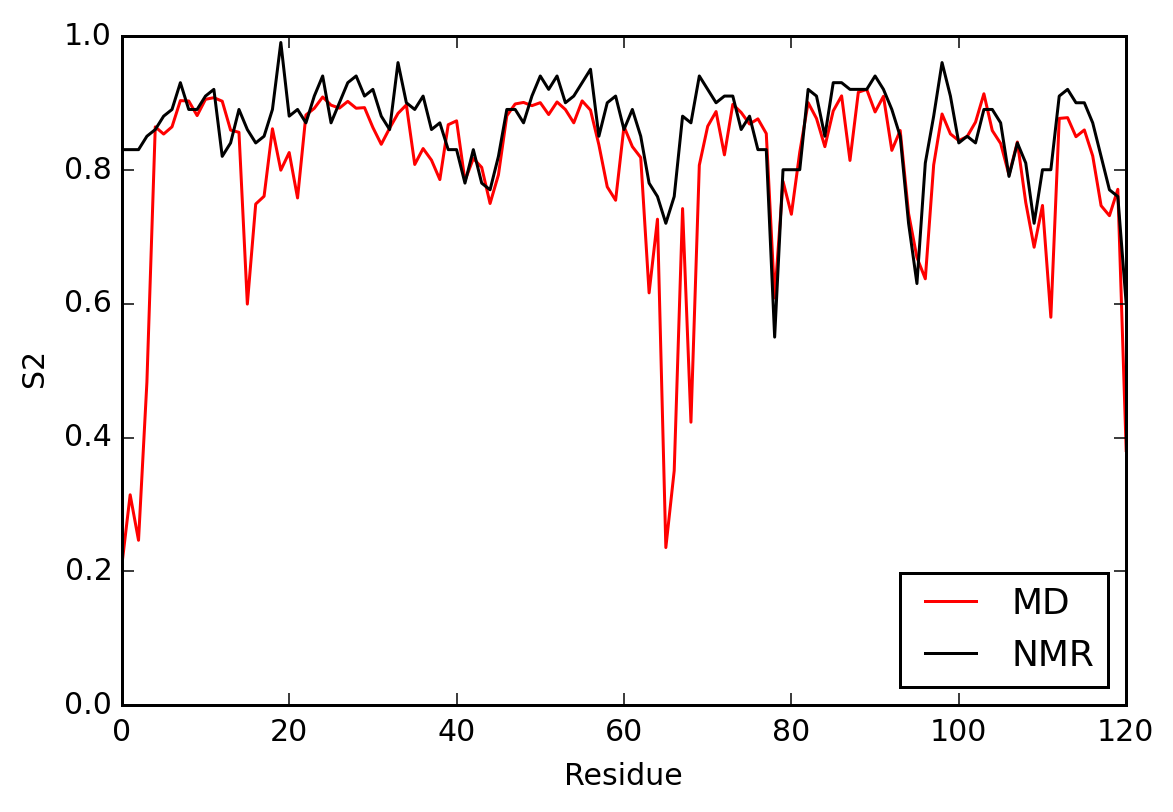

In [6]:
# plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib
from matplotlib import pyplot as plt

plt.plot(s2, 'red', label='MD')
plt.plot(s2_expl, 'black', label='NMR')
plt.ylim([0., 1.])
plt.ylabel('S2')
plt.xlabel('Residue')
plt.legend(loc=4)

In [7]:
# get help
help(pt.NH_order_paramters)

Help on function NH_order_paramters in module pytraj.common_actions:

NH_order_paramters(traj, vector_pairs, order=2, tstep=1.0, tcorr=10000.0)
    compute NH order parameters
    
    Parameters
    ----------
    traj : Trajectory-like
    vector_pairs : 2D array-like, shape (n_pairs, 2)
    order : default 2
    tstep : default 1.
    tcorr : default 10000.
    
    Returns
    -------
    S2 : 1D array, order parameters
    
    Examples
    --------
    >>> import pytraj as pt
    >>> h_indices = pt.select_atoms(traj.top, '@H')
    >>> n_indices = h_indices - 1
    >>> nh_pairs = list(zip(n_indices, h_indices))
    >>> data = pt.NH_order_paramters(traj, nh_pairs)
    >>> print(data)

